In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

def add_salt_and_pepper_noise(image, salt_pepper_ratio=0.02, amount=0.01):
    # 获取图像的宽高
    row, col = image.shape
    # 计算要添加的噪声数量
    num_salt = np.ceil(amount * image.size * salt_pepper_ratio)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_pepper_ratio))

    # 随机选择像素点
    coords = [(random.randint(0, row - 1), random.randint(0, col - 1)) for _ in range(int(num_salt))]
    coords.extend([(random.randint(0, row - 1), random.randint(0, col - 1)) for _ in range(int(num_pepper))])
    
    # 将选中的像素点设置为白或黑
    for coord in coords:
        image[coord] = 255 if random.random() < salt_pepper_ratio else 0

    return image


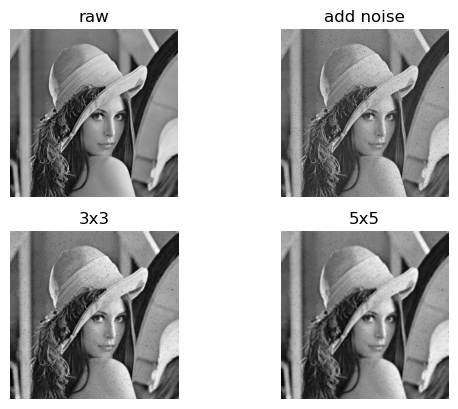

In [3]:
#均值滤波
# 读取图像
I = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('raw')
plt.axis('off')

# 添加椒盐噪声
J = add_salt_and_pepper_noise(I)

# 显示原图像和加噪图像

plt.subplot(2, 2, 2)
plt.imshow(J, cmap='gray')
plt.title('add noise')
plt.axis('off')

# 均值滤波处理
K1 = cv2.blur(J, (3, 3))
K2 = cv2.blur(J, (5, 5))

# 显示滤波处理结果
plt.subplot(2, 2, 3)
plt.imshow(K1, cmap='gray')
plt.title('3x3')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(K2, cmap='gray')
plt.title('5x5')
plt.axis('off')

# 显示图像
plt.show()


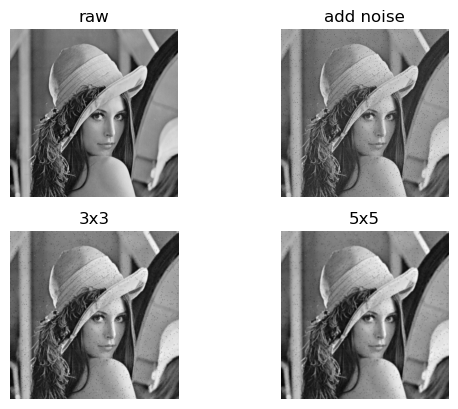

In [4]:
#高斯滤波
# 读取图像
I = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('raw')
plt.axis('off')

# 添加椒盐噪声
J = add_salt_and_pepper_noise(I)

# 显示原图像和加噪图像

plt.subplot(2, 2, 2)
plt.imshow(J, cmap='gray')
plt.title('add noise')
plt.axis('off')

# 均值滤波处理
K1 = cv2.GaussianBlur(J, (3, 3),0)
K2 = cv2.GaussianBlur(J, (5, 5),0)

# 显示滤波处理结果
plt.subplot(2, 2, 3)
plt.imshow(K1, cmap='gray')
plt.title('3x3')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(K2, cmap='gray')
plt.title('5x5')
plt.axis('off')

# 显示图像
plt.show()


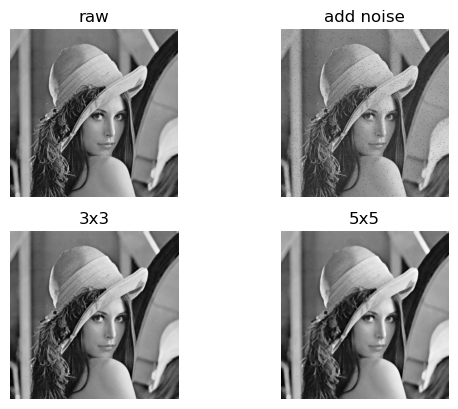

In [5]:
#中值滤波
# 读取图像
I = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('raw')
plt.axis('off')

# 添加椒盐噪声
J = add_salt_and_pepper_noise(I)
plt.subplot(2, 2, 2)
plt.imshow(J, cmap='gray')
plt.title('add noise')
plt.axis('off')

# 中值滤波处理
K1 = cv2.medianBlur(J, 3)
K2 = cv2.medianBlur(J, 5)

# 显示滤波处理结果
plt.subplot(2, 2, 3)
plt.imshow(K1, cmap='gray')
plt.title('3x3')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(K2, cmap='gray')
plt.title('5x5')
plt.axis('off')

# 显示图像
plt.show()


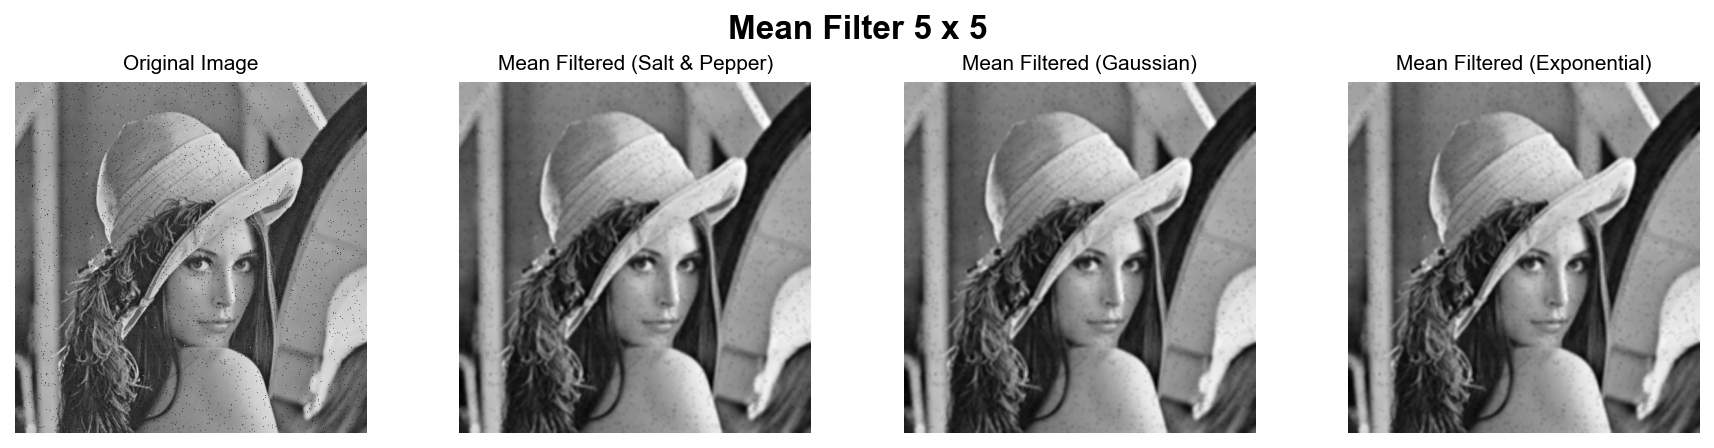

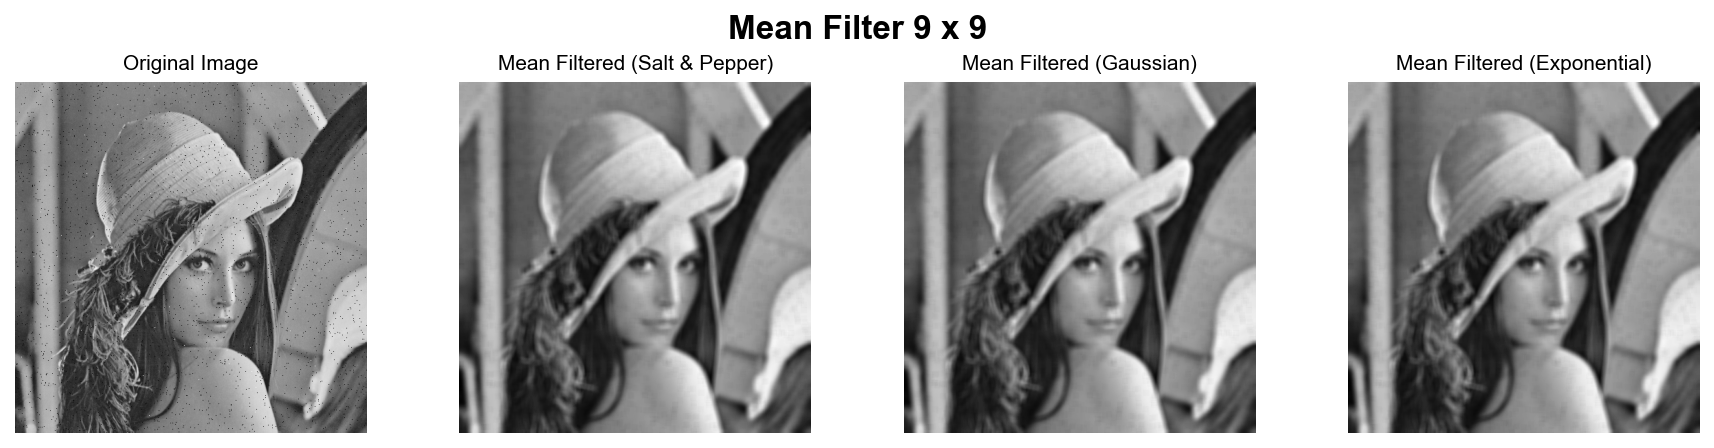

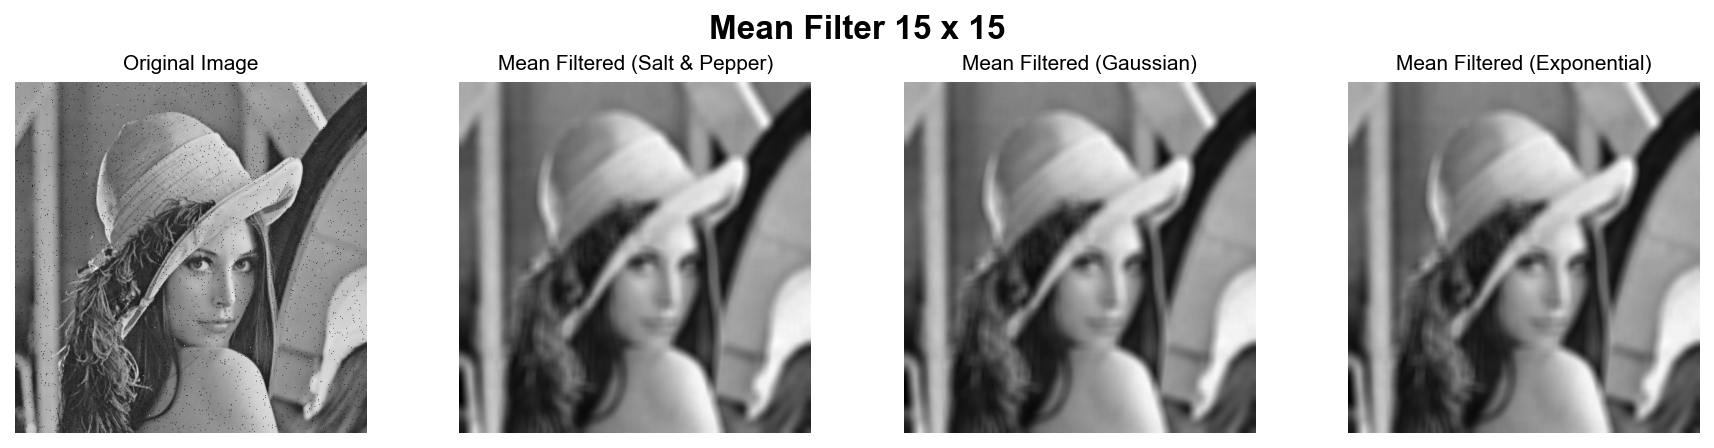

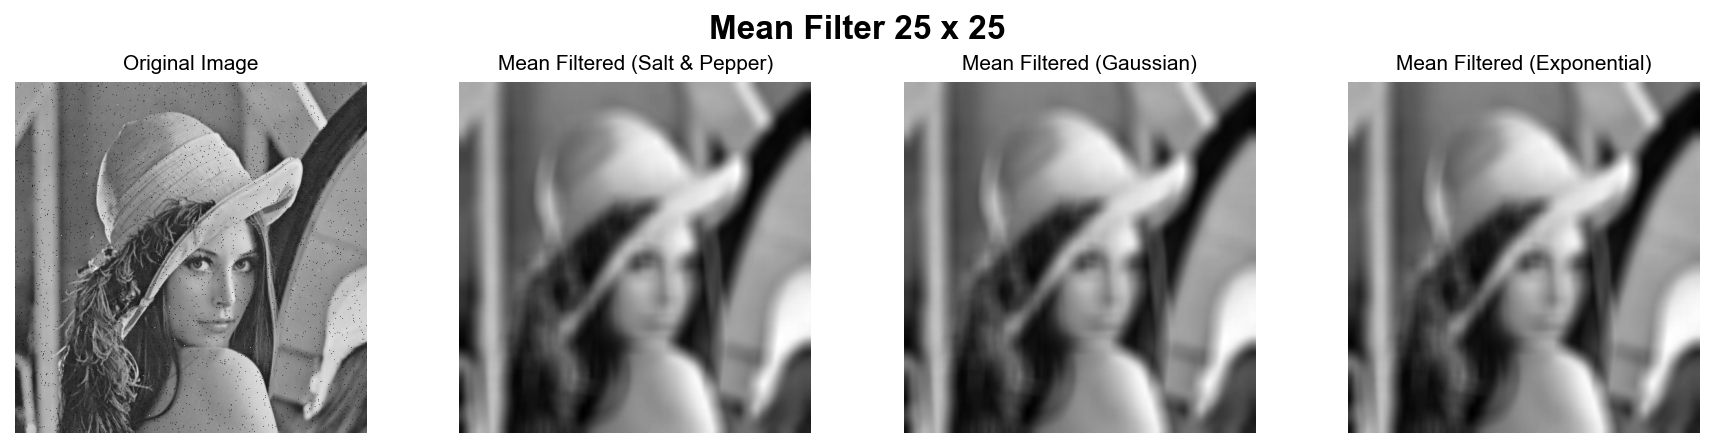

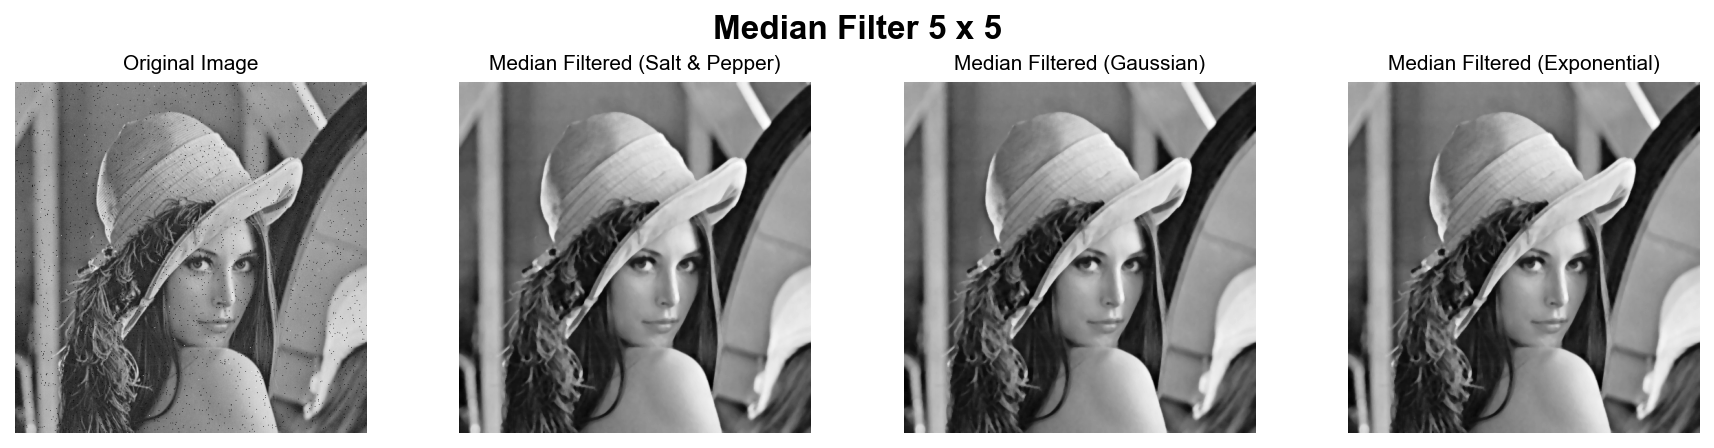

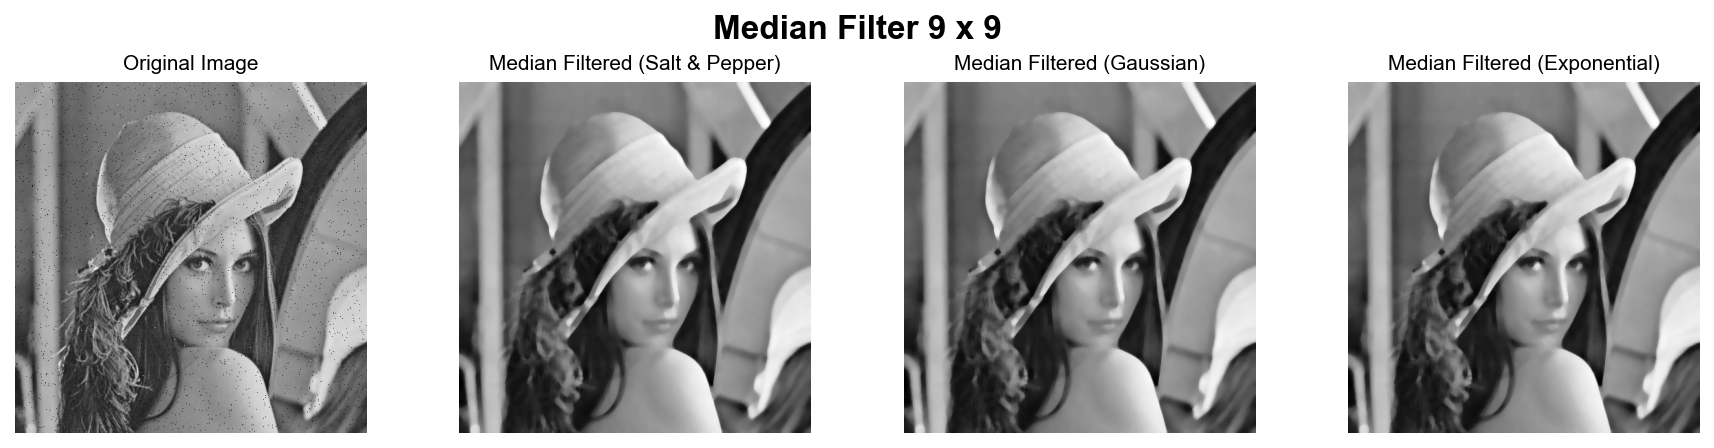

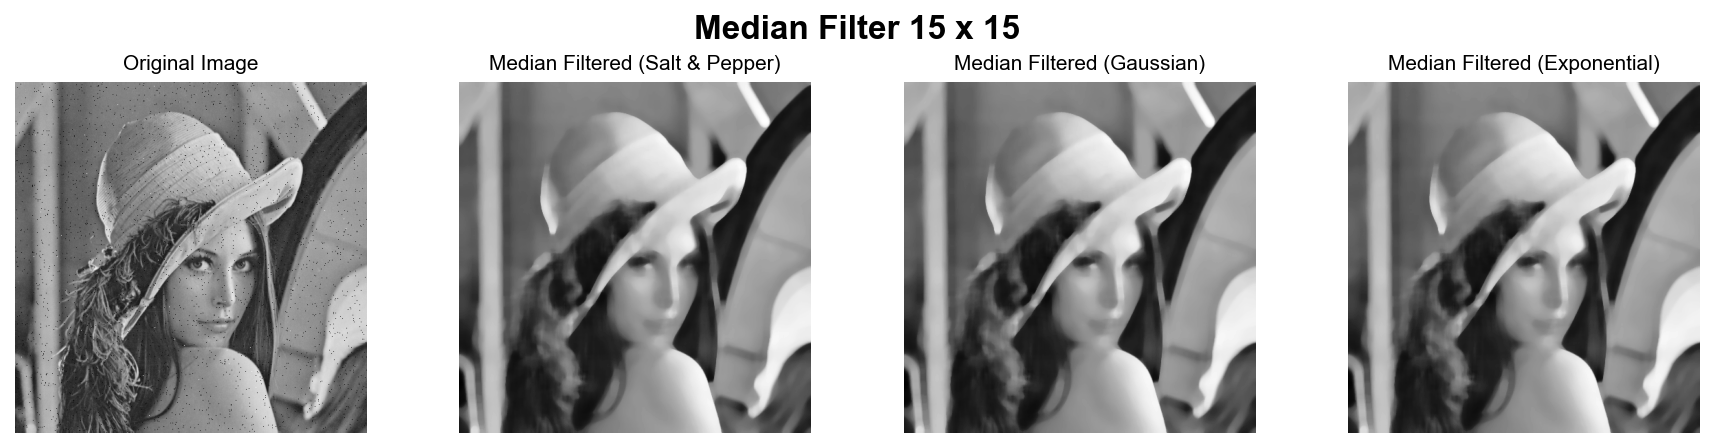

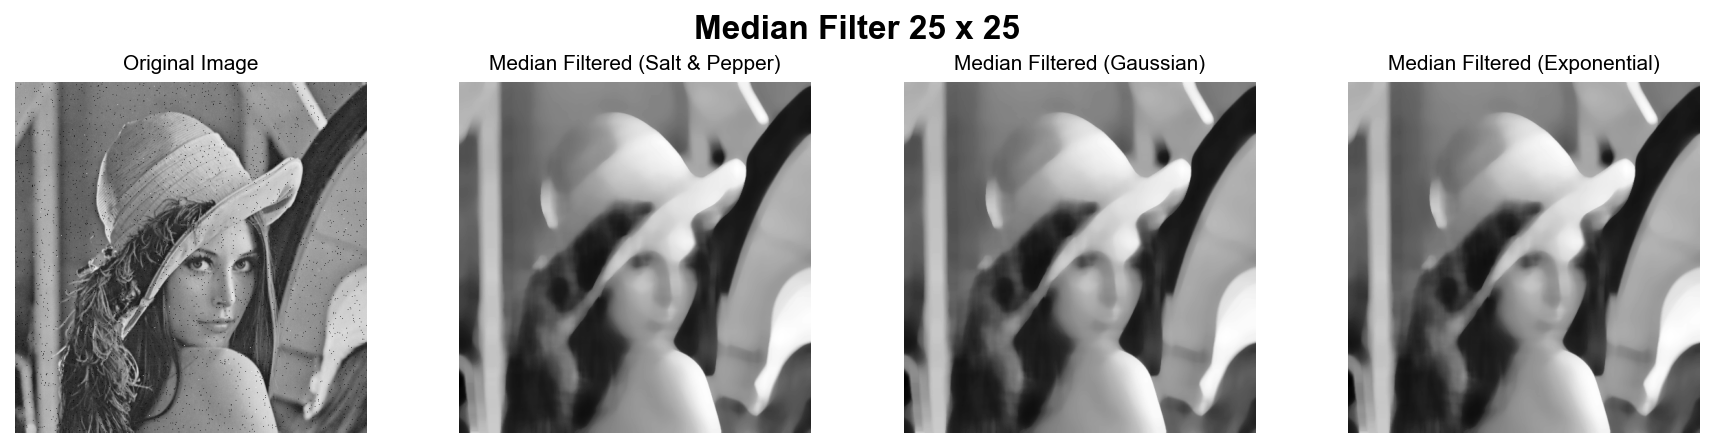

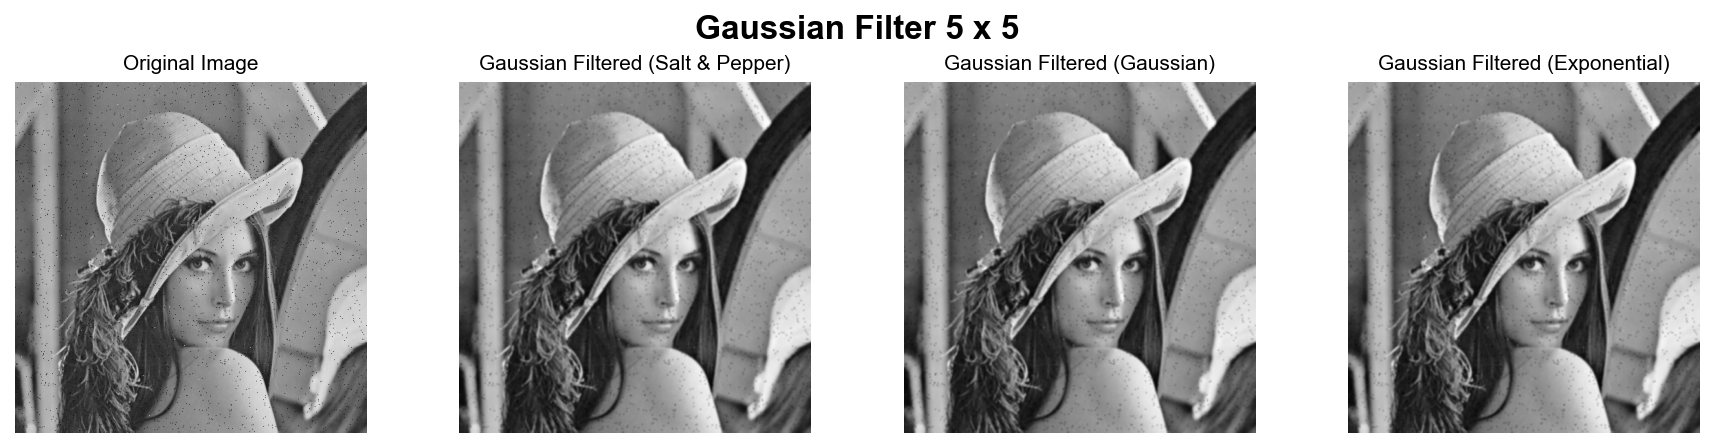

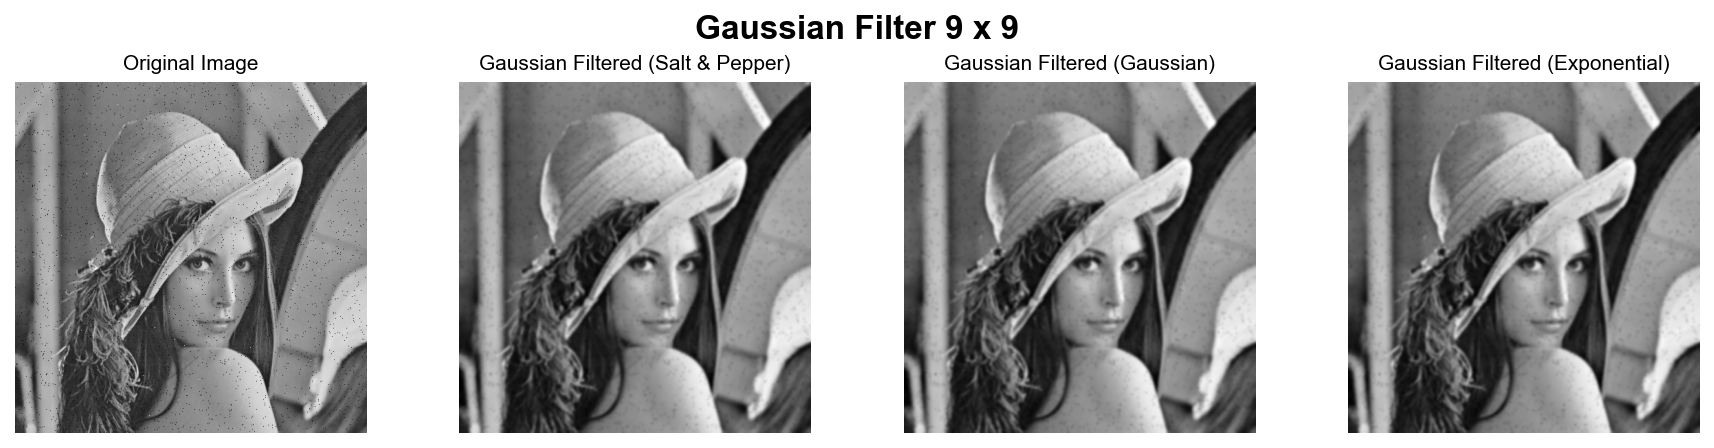

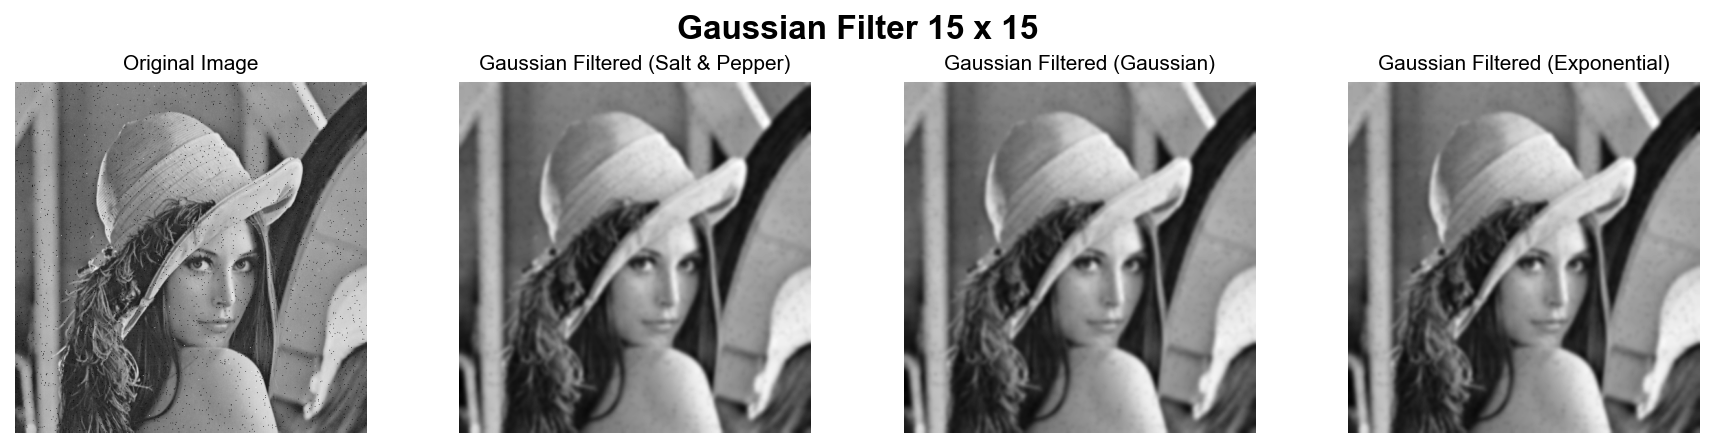

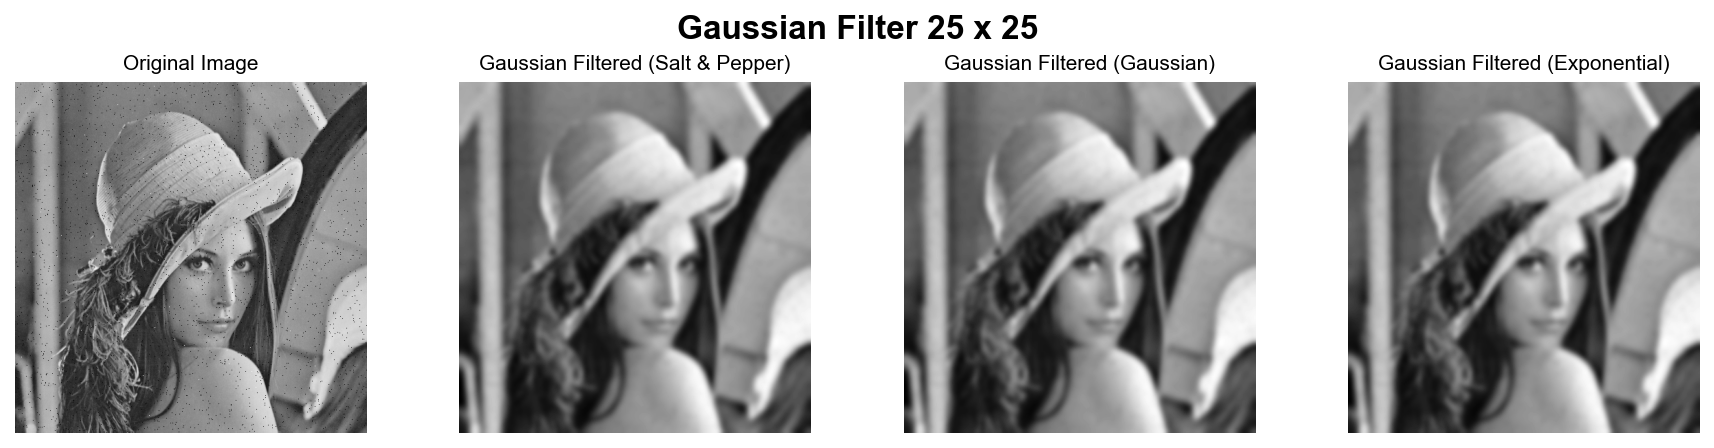

In [43]:
kernel_size = [5,9,15,25]

I = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
I_salt_and_pepper = add_salt_and_pepper_noise(I)

# 设置高斯噪声参数
mean = 0  # 均值
variance = 0.1**2  # 方差，决定了噪声的强度
# 生成与图像相同尺寸的高斯噪声
noise = np.random.normal(mean, variance ** 0.5, I.shape)
# 将噪声添加到图像
I_gaussian = I + noise
# 转为int类型
I_gaussian = np.clip(I_gaussian, 0, 255).astype(np.uint8)

# 指数噪声
# 设置指数分布的尺度参数，这个参数可以根据需要进行调整
scale = 0.5
# 生成与图像大小相同的指数噪声矩阵
noise = np.random.exponential(scale, I.shape)
I_exponential = I + noise
# 转为int类型
I_exponential = np.clip(I_exponential, 0, 255).astype(np.uint8)

# 均值滤波
for size in kernel_size:
    I_mean_salt_and_pepper = cv2.blur(I_salt_and_pepper, (size, size))
    I_mean_gaussian = cv2.blur(I_gaussian, (size, size))
    I_mean_exponential = cv2.blur(I_exponential, (size, size))
    
    # 设置全局字体大小和样式
    plt.rcParams.update({'font.size': 10, 'font.family': 'Arial'})

    # 创建子图并优化布局
    fig, axs = plt.subplots(1, 4, figsize=(12, 3), dpi=150)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 调整子图间距

    # 添加大标题
    fig.suptitle(f'Mean Filter {size} x {size}', fontsize=16, fontweight='bold')

    # 原始图像
    axs[0].imshow(I_salt_and_pepper, cmap='gray')
    axs[0].set_title('Original Image', fontsize=10)
    axs[0].axis('off')

    # Salt and Pepper 平滑处理
    axs[1].imshow(I_mean_salt_and_pepper, cmap='gray')  # 可尝试其他cmap如'bone'增强对比
    axs[1].set_title('Mean Filtered (Salt & Pepper)', fontsize=10)
    axs[1].axis('off')

    # 高斯噪声平滑处理
    axs[2].imshow(I_mean_gaussian, cmap='gray')
    axs[2].set_title('Mean Filtered (Gaussian)', fontsize=10)
    axs[2].axis('off')

    # 指数噪声平滑处理
    axs[3].imshow(I_mean_exponential, cmap='gray')
    axs[3].set_title('Mean Filtered (Exponential)', fontsize=10)
    axs[3].axis('off')

    # 显示图像
    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    plt.show()


# 中值滤波
for size in kernel_size:
    I_median_salt_and_pepper = cv2.medianBlur(I_salt_and_pepper, size)
    I_median_gaussian = cv2.medianBlur(I_gaussian, size)
    I_median_exponential = cv2.medianBlur(I_exponential, size)
    
    # 设置全局字体大小和样式
    plt.rcParams.update({'font.size': 10, 'font.family': 'Arial'})

    # 创建子图并优化布局
    fig, axs = plt.subplots(1, 4, figsize=(12, 3), dpi=150)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # 添加大标题
    fig.suptitle(f'Median Filter {size} x {size}', fontsize=16, fontweight='bold')

    # 原始图像
    axs[0].imshow(I_salt_and_pepper, cmap='gray')
    axs[0].set_title('Original Image', fontsize=10)
    axs[0].axis('off')

    # Salt and Pepper 平滑处理
    axs[1].imshow(I_median_salt_and_pepper, cmap='gray')
    axs[1].set_title('Median Filtered (Salt & Pepper)', fontsize=10)
    axs[1].axis('off')

    # 高斯噪声平滑处理
    axs[2].imshow(I_median_gaussian, cmap='gray')
    axs[2].set_title('Median Filtered (Gaussian)', fontsize=10)
    axs[2].axis('off')

    # 指数噪声平滑处理
    axs[3].imshow(I_median_exponential, cmap='gray')
    axs[3].set_title('Median Filtered (Exponential)', fontsize=10)
    axs[3].axis('off')

    # 显示图像
    plt.tight_layout()
    plt.show()

# 高斯滤波
for size in kernel_size:
    I_gaussian_salt_and_pepper = cv2.GaussianBlur(I_salt_and_pepper, (size, size), 0)
    I_gaussian_gaussian = cv2.GaussianBlur(I_gaussian, (size, size), 0)
    I_gaussian_exponential = cv2.GaussianBlur(I_exponential, (size, size), 0)

    # 设置全局字体大小和样式
    plt.rcParams.update({'font.size': 10, 'font.family': 'Arial'})
    
    # 创建子图并优化布局
    fig, axs = plt.subplots(1, 4, figsize=(12, 3), dpi=150)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # 添加大标题
    fig.suptitle(f'Gaussian Filter {size} x {size}', fontsize=16, fontweight='bold')

    # 原始图像
    axs[0].imshow(I_salt_and_pepper, cmap='gray')
    axs[0].set_title('Original Image', fontsize=10)
    axs[0].axis('off')

    # Salt and Pepper 平滑处理
    axs[1].imshow(I_gaussian_salt_and_pepper, cmap='gray')
    axs[1].set_title('Gaussian Filtered (Salt & Pepper)', fontsize=10)
    axs[1].axis('off')

    # 高斯噪声平滑处理
    axs[2].imshow(I_gaussian_gaussian, cmap='gray')
    axs[2].set_title('Gaussian Filtered (Gaussian)', fontsize=10)
    axs[2].axis('off')

    # 指数噪声平滑处理
    axs[3].imshow(I_gaussian_exponential, cmap='gray')
    axs[3].set_title('Gaussian Filtered (Exponential)', fontsize=10)
    axs[3].axis('off')

    # 显示图像
    plt.tight_layout()
    plt.show()



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = [5,9,15,25]

I = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
I_salt_and_pepper = add_salt_and_pepper_noise(I)

mean = 0  
variance = 0.1**2 
noise = np.random.normal(mean, variance ** 0.5, I.shape)
I_gaussian = I + noise

scale = 0.5
noise = np.random.exponential(scale, I.shape)
I_exponential = I + noise

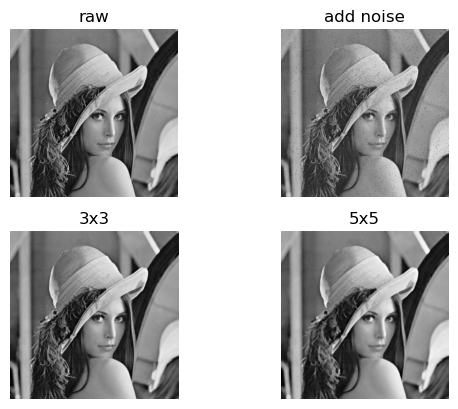

In [6]:
#手动实现中值滤波
def median_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")
        
    # 获取图像的尺寸
    height, width = image.shape
    
    # 创建一个与原图大小相同的输出数组
    filtered_image = np.zeros_like(image)
    
    # 遍历图像的每个像素点
    for i in range(height):
        for j in range(width):
            # 对于每个像素点，收集其周围像素点的值
            kernel = []
            for x in range(kernel_size):
                for y in range(kernel_size):
                    # 计算当前窗口内的像素点的坐标
                    nx, ny = i + x - kernel_size // 2, j + y - kernel_size // 2
                    # 忽略超出图像边界的坐标
                    if 0 <= nx < height and 0 <= ny < width:
                        kernel.append(image[nx, ny])
            
            # 对收集到的值进行排序，并取中值
            kernel.sort()
            median_value = kernel[len(kernel) // 2]
            
            # 将中值赋值给输出数组的对应位置
            filtered_image[i, j] = median_value
    
    return filtered_image

#中值滤波
# 读取图像
I = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('raw')
plt.axis('off')

# 添加椒盐噪声
J = add_salt_and_pepper_noise(I)
plt.subplot(2, 2, 2)
plt.imshow(J, cmap='gray')
plt.title('add noise')
plt.axis('off')

# 中值滤波
K1 = median_filter(J, 3)
K2 = median_filter(J, 5)

# 显示滤波处理结果
plt.subplot(2, 2, 3)
plt.imshow(K1, cmap='gray')
plt.title('3x3')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(K2, cmap='gray')
plt.title('5x5')
plt.axis('off')

# 显示图像
plt.show()